In [29]:
import pandas as pd

# Load the provided files
csv_file_path = "UCIdiabetes_copy.csv"

# Read the CSV and Excel files
df= pd.read_csv(csv_file_path)

In [36]:
df.to_excel("Encoded data.xlsx")

In [30]:
# Replace "?" in the 'race' column with "Other" (safe approach)
df['race'] = df['race'].replace('?', 'Other')


In [31]:

# Drop irrelevant columns
df = df.drop(columns=['SR ', 'encounter_id', 'patient_nbr', 'weight', 'payer_code'])



In [32]:

from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders for later use
label_encoders = {}

# Loop through categorical columns
for column in df.select_dtypes(include='object').columns:
    if column == 'medical_specialties':  # Handle 'medical_specialties' separately
        pass
    elif df[column].nunique() > 1:  # Exclude columns with only one unique value
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store label encoder for the column

In [77]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
0,2,0,0,6,25,1,1,37,41,0,...,0,No,0,0,1,0,2,2,0,0
1,2,0,1,1,1,7,3,0,59,0,...,0,No,0,0,0,1,1,0,2,0
2,0,0,2,1,1,7,2,0,11,5,...,0,No,0,0,1,1,2,0,2,0
3,2,1,3,1,1,7,2,0,44,1,...,0,No,0,0,0,1,2,0,2,1
4,2,1,4,1,1,7,1,0,51,0,...,0,No,0,0,0,1,2,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,0,1,7,1,3,7,3,0,51,0,...,0,No,0,0,0,1,1,2,0,1
69165,0,0,8,1,4,5,5,0,33,3,...,0,No,0,0,1,1,2,3,0,3
69166,2,1,7,1,1,7,1,0,53,0,...,0,No,0,0,0,1,2,0,4,0
69167,2,0,8,2,3,7,10,61,45,2,...,0,No,0,0,0,1,2,5,0,5


In [98]:
unknown_specialty = df_new[df_new['medical_specialty'] == '?'].copy()
df_new = df_new[df_new['medical_specialty'] != '?']
df_new

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
0,0,2,0,0,6,25,1,1,Pediatrics-Endocrinology,41,...,0,0,0,0,1,0,2,2,0,0
9,9,2,0,9,3,3,4,12,InternalMedicine,33,...,0,0,0,0,0,1,2,1,7,8
12,12,2,1,8,1,6,7,10,Family/GeneralPractice,55,...,0,0,0,0,1,1,2,1,1,1
16,16,2,0,5,1,1,7,3,Cardiology,29,...,0,0,0,0,1,1,2,0,7,2
25,25,2,1,8,1,3,7,6,Cardiology,64,...,0,0,0,0,0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69129,69129,2,0,7,1,1,7,12,Surgery-Thoracic,72,...,0,0,0,0,0,1,2,1,0,8
69139,69139,2,1,7,2,6,7,6,Emergency/Trauma,46,...,0,0,0,0,0,1,2,3,3,2
69150,69150,2,0,7,1,22,7,8,InternalMedicine,51,...,0,0,0,0,1,1,1,1,0,2
69152,69152,2,0,7,3,6,1,3,Orthopedics,27,...,0,0,0,0,0,1,2,6,1,2


In [120]:
df_new

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_name,diag_2_name,diag_3_name
0,0,2,0,0,6,25,1,1,Pediatrics-Endocrinology,41,...,0,0,0,0,1,0,2,2,0,0
1,1,2,0,1,1,1,7,3,?,59,...,0,0,0,0,0,1,1,0,2,0
2,2,0,0,2,1,1,7,2,?,11,...,0,0,0,0,1,1,2,0,2,0
3,3,2,1,3,1,1,7,2,?,44,...,0,0,0,0,0,1,2,0,2,1
4,4,2,1,4,1,1,7,1,?,51,...,0,0,0,0,0,1,2,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69164,69164,0,1,7,1,3,7,3,?,51,...,0,0,0,0,0,1,1,2,0,1
69165,69165,0,0,8,1,4,5,5,?,33,...,0,0,0,0,1,1,2,3,0,3
69166,69166,2,1,7,1,1,7,1,?,53,...,0,0,0,0,0,1,2,0,4,0
69167,69167,2,0,8,2,3,7,10,Surgery-General,45,...,0,0,0,0,0,1,2,5,0,5


In [119]:
import pandas as pd

# Load the provided files
excel_file_path = "Encoded data_copy.xlsx"

# Read the CSV and Excel files
df_new= pd.read_excel(excel_file_path)

In [76]:
df_new.to_excel("encoded Complete data.xlsx")

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Separate rows with missing 'medical_specialty' for later prediction
unknown_specialty = df_new[df_new['medical_specialty'] == '?'].copy()
df_new = df_new[df_new['medical_specialty'] != '?']

# Encode 'medical_specialty' as labels
le_specialty = LabelEncoder()
df_new['medical_specialty'] = le_specialty.fit_transform(df_new['medical_specialty'])

# Get the mapping of encoded labels to original values
specialty_mapping = dict(zip(le_specialty.classes_, le_specialty.transform(le_specialty.classes_)))

# Split data into features and target
X = df_new.drop(columns=['medical_specialty'])
y = df_new['medical_specialty']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values remain in the features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Predict 'medical_specialty' for missing values
unknown_predictions = model.predict(unknown_specialty.drop(columns=['medical_specialty']))

# Add the predictions to the unknown specialty DataFrame
unknown_specialty['medical_specialty'] = unknown_predictions

# Combine all data into a final DataFrame
df_new_final = pd.concat([
    pd.DataFrame({'medical_specialty': y_train}).join(X_train.reset_index(drop=True)),
    pd.DataFrame({'medical_specialty': y_test}).join(X_test.reset_index(drop=True)),
    unknown_specialty
], ignore_index=True)

# Save the final DataFrame to disk if needed
# df_new_final.to_csv('df_new_final.csv', index=False)

print("Final DataFrame Shape:", df_new_final.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22060\463073801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['medical_specialty'] = le_specialty.fit_transform(df_new['medical_specialty'])


Final DataFrame Shape: (69169, 47)


In [107]:
# Predict 'medical_specialty' for missing values
unknown_predictions = model.predict(unknown_specialty.drop(columns=['medical_specialty']))

# Add the predictions to the unknown specialty DataFrame
unknown_specialty['medical_specialty'] = unknown_predictions

# Combine all data into a final DataFrame
df_new_final = pd.concat([
    pd.DataFrame({'medical_specialty': y_train}).join(X_train.reset_index(drop=True)),
    pd.DataFrame({'medical_specialty': y_test}).join(X_test.reset_index(drop=True)),
    unknown_specialty
], ignore_index=True)

# Save the final DataFrame to disk if needed
# df_new_final.to_csv('df_new_final.csv', index=False)

print("Final DataFrame Shape:", df_new_final.shape)

Final DataFrame Shape: (69169, 47)


In [128]:
unknown_specialty.to_excel("Unknown medical speciality.xlsx")

In [105]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))


Classification Report on Test Set:
                                      precision    recall  f1-score   support

                      Anesthesiology       0.00      0.00      0.00         3
            Anesthesiology-Pediatric       0.00      0.00      0.00         4
                          Cardiology       0.56      0.55      0.55       810
                Cardiology-Pediatric       0.00      0.00      0.00         1
                             DCPTEAM       0.00      0.00      0.00         1
                           Dentistry       0.00      0.00      0.00         2
                    Emergency/Trauma       0.70      0.74      0.72       839
                       Endocrinology       0.00      0.00      0.00        13
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.47      0.24      0.32       966
                    Gastroenterology       0.00      0.00      0.00        82
                          Gy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
# Predict 'medical_specialty' for missing values
unknown_predictions = model.predict(unknown_specialty_filled.drop(columns=['medical_specialty']))

# Add the predictions to the unknown specialty DataFrame
unknown_specialty['medical_specialty'] = unknown_predictions

# Combine all data into a final DataFrame
df_new_final = pd.concat([
    pd.DataFrame({'medical_specialty': y_train}).join(X_train.reset_index(drop=True)),
    pd.DataFrame({'medical_specialty': y_test}).join(X_test.reset_index(drop=True)),
    unknown_specialty
], ignore_index=True)

# Save the final DataFrame to disk if needed
# df_new_final.to_csv('df_new_final.csv', index=False)

print("Final DataFrame Shape:", df_new_final.shape)

NameError: name 'unknown_specialty_filled' is not defined

In [74]:
# Get unique labels in test set
unique_labels_in_test = np.unique(y_test)

# Generate the classification report with correct target names
print("Classification Report on Test Set:")
print(
    classification_report(
        y_test, 
        y_pred, 
        labels=unique_labels_in_test, 
        target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]  # Ensure target names are strings
    )
)


Classification Report on Test Set:


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: object of type 'numpy.int32' has no len()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Standardize the features (SVMs work better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)  # You can try other kernels like 'rbf'
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=le_specialty.classes_))

Classification Report on Test Set:


ValueError: Number of classes, 65, does not match size of target_names, 69. Try specifying the labels parameter

In [84]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))


Classification Report on Test Set:
                                      precision    recall  f1-score   support

                                   ?       0.62      0.93      0.74      6690
                AllergyandImmunology       0.00      0.00      0.00         1
                      Anesthesiology       0.00      0.00      0.00         5
            Anesthesiology-Pediatric       0.00      0.00      0.00         6
                          Cardiology       0.59      0.32      0.42       798
                Cardiology-Pediatric       0.00      0.00      0.00         2
                             DCPTEAM       0.00      0.00      0.00         1
                    Emergency/Trauma       0.73      0.58      0.64       839
                       Endocrinology       0.00      0.00      0.00        10
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.38      0.05      0.09       952
                    Gastroen

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))


Classification Report on Test Set:
                                      precision    recall  f1-score   support

                      Anesthesiology       0.00      0.00      0.00         3
            Anesthesiology-Pediatric       0.17      0.25      0.20         4
                          Cardiology       0.51      0.25      0.34       810
                Cardiology-Pediatric       0.00      0.00      0.00         1
                             DCPTEAM       0.00      0.00      0.00         1
                           Dentistry       0.00      0.00      0.00         2
                    Emergency/Trauma       0.49      0.68      0.57       839
                       Endocrinology       0.01      0.31      0.02        13
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.41      0.07      0.13       966
                    Gastroenterology       0.03      0.05      0.04        82
                          Gy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Split data into features and target
X = df_new.drop(columns=['medical_specialty'])
y = df_new['medical_specialty']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values remain in the features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [56]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))



Classification Report on Test Set:
                                      precision    recall  f1-score   support

                      Anesthesiology       0.00      0.00      0.00         3
            Anesthesiology-Pediatric       0.00      0.00      0.00         4
                          Cardiology       0.43      0.32      0.37       810
                Cardiology-Pediatric       0.12      1.00      0.22         1
                             DCPTEAM       0.00      0.00      0.00         1
                           Dentistry       0.00      0.00      0.00         2
                    Emergency/Trauma       0.47      0.76      0.58       839
                       Endocrinology       0.03      0.08      0.04        13
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.34      0.08      0.13       966
                    Gastroenterology       0.00      0.00      0.00        82
                          Gy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))



Classification Report on Test Set:
                                      precision    recall  f1-score   support

                      Anesthesiology       0.00      0.00      0.00         3
            Anesthesiology-Pediatric       0.00      0.00      0.00         4
                          Cardiology       0.43      0.32      0.37       810
                Cardiology-Pediatric       0.12      1.00      0.22         1
                             DCPTEAM       0.00      0.00      0.00         1
                           Dentistry       0.00      0.00      0.00         2
                    Emergency/Trauma       0.47      0.76      0.58       839
                       Endocrinology       0.03      0.08      0.04        13
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.34      0.08      0.13       966
                    Gastroenterology       0.00      0.00      0.00        82
                          Gy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


# Split data into features and target
X = df_new.drop(columns=['medical_specialty'])
y = df_new['medical_specialty']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values remain in the features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np


# Split data into features and target
X = df_new.drop(columns=['medical_specialty'])
y = df_new['medical_specialty']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values remain in the features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure all classes are represented in y_train
all_classes = np.arange(len(specialty_mapping))
if not np.array_equal(np.unique(y_train), all_classes):
    missing_classes = np.setdiff1d(all_classes, np.unique(y_train))
    for cls in missing_classes:
        # Add one instance of each missing class with dummy data
        X_train = pd.concat([X_train, pd.DataFrame([X_train.iloc[0]])])
        y_train = pd.concat([y_train, pd.Series([cls])])

# Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=le_specialty.classes_))


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report on Test Set:


ValueError: Number of classes, 57, does not match size of target_names, 69. Try specifying the labels parameter

In [63]:
from sklearn.metrics import classification_report

# Find the unique labels in y_test
unique_labels_in_test = sorted(set(y_test))

# Evaluate the model
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, labels=unique_labels_in_test, target_names=[le_specialty.classes_[label] for label in unique_labels_in_test]))



Classification Report on Test Set:
                                      precision    recall  f1-score   support

                      Anesthesiology       0.00      0.00      0.00         3
            Anesthesiology-Pediatric       0.00      0.00      0.00         4
                          Cardiology       0.57      0.53      0.55       810
                Cardiology-Pediatric       0.00      0.00      0.00         1
                             DCPTEAM       0.00      0.00      0.00         1
                           Dentistry       0.00      0.00      0.00         2
                    Emergency/Trauma       0.71      0.69      0.70       839
                       Endocrinology       0.00      0.00      0.00        13
            Endocrinology-Metabolism       0.00      0.00      0.00         1
              Family/GeneralPractice       0.39      0.25      0.30       966
                    Gastroenterology       0.25      0.05      0.08        82
                          Gy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
file_path = "Final Final Final data.xlsx"
df = pd.read_excel(file_path)

# Define relevant features and target variable
features = [
    'age', 'gender', 'race', 'admission_type_id', 'time_in_hospital',
    'discharge_disposition_id', 'number_diag0ses', 'number_inpatient',
    'max_glu_serum', 'A1Cresult', 'metformin', 'insulin'
]
target = 'readmitted'

# Filter the dataset for relevant features
df = df[features + [target]]

# Handle missing values by filling with 0 (or apply other strategies as needed)
df.fillna(0, inplace=True)

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['race', 'gender', 'max_glu_serum', 'A1Cresult'], drop_first=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       643
           1       0.34      0.02      0.04      2845
           2       0.75      0.99      0.86     10346

    accuracy                           0.75     13834
   macro avg       0.36      0.34      0.30     13834
weighted avg       0.63      0.75      0.65     13834



In [133]:
df.head()


,age,gender,race,admission_type_id,time_in_hospital,discharge_disposition_id,number_diag0ses,number_inpatient,max_glu_serum,A1Cresult,metformin,insulin,readmitted
0,0,0,2,6,1,25,1,0,3,3,1,1,2
1,1,0,2,1,3,1,9,0,3,3,1,3,1
2,2,0,0,1,2,1,6,1,3,3,1,1,2
3,3,1,2,1,2,1,7,0,3,3,1,3,2
4,4,1,2,1,1,1,5,0,3,3,1,2,2


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     13191
           1       0.67      0.01      0.01       643

    accuracy                           0.95     13834
   macro avg       0.81      0.50      0.49     13834
weighted avg       0.94      0.95      0.93     13834



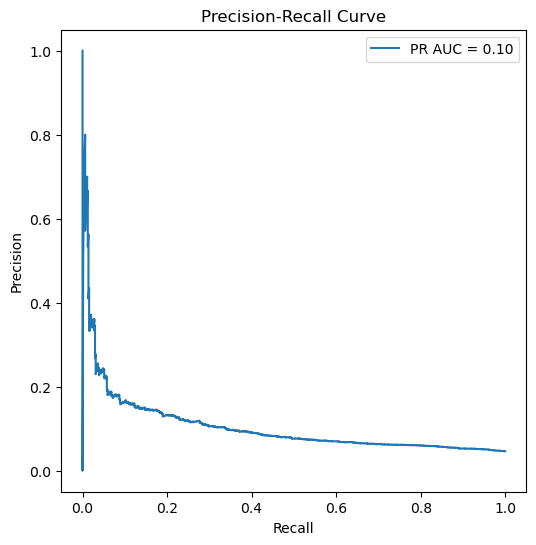

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
file_path = 'Final Final Final data.xlsx'
df = pd.read_excel(file_path)

# Define relevant features and target variable
features = [
    'age', 'gender', 'race', 'admission_type_id', 'time_in_hospital',
    'discharge_disposition_id', 'number_diag0ses', 'number_inpatient',
    'max_glu_serum', 'A1Cresult', 'metformin', 'insulin'
]
target = 'Early Readmission'  # Use the new binary target feature

# Filter the dataset for relevant features
df = df[features + [target]]


# Split data into features (X) and target (y)
X = df[features]
y = df[target]



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute AUC of the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.65960677 0.66546191 0.66032962 0.67044962 0.67143787]
Mean Cross-Validation Accuracy: 0.665457155383345


Confusion Matrix:
[[13189     2]
 [  639     4]]


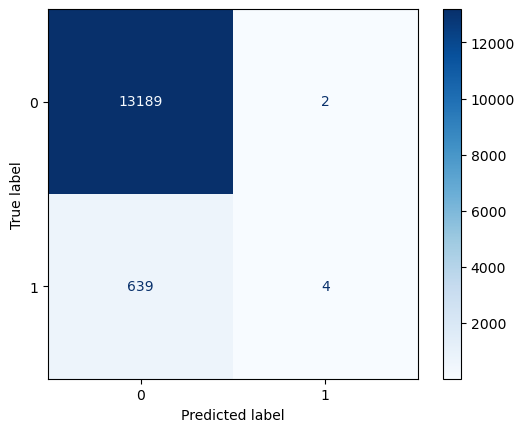

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)

In [141]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute AUC of the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

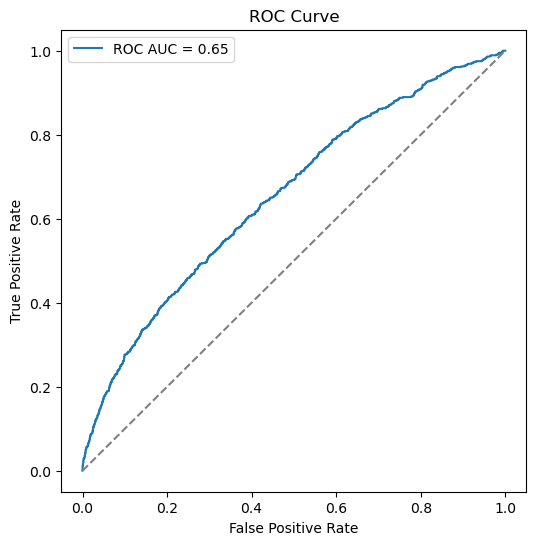

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
